In [ ]:
#written on 8.28 by @caramnix

In [2]:
import json
import os
import glob
import pprint
import pandas as pd
import numpy as np

In [3]:
def find_avg_income(step):
    l=[]
    step_in= step["HHincome2019"]
    step_t= step["population"]
    enum_AZ= step_in.keys()
    for j in enum_AZ:
        tot_income= step_in[j]
        total= step_t[j]
        if total ==0: 
            l.append(0)
            print("pop in AZ = 0")
        else:
            l.append(tot_income/total) #income by population
    return np.mean(l)

#find_avg_income(chain["1"])

def find_perc_black(step):
    l=[]
    step_b= step["black_population"]
    step_t= step["population"]
    enum_AZ= step_b.keys()
    for j in enum_AZ:
        num_black= step_b[j]
        total= step_t[j]
        if total == 0: 
            l.append(0)
        else:
            l.append(num_black/total)
    return np.mean(l)
#find_perc_black(chain["1"])

def find_isolation(step):
    step_b= step["black_population"]
    total_b_pop_SD= sum(step["black_population"].values())
    enum_AZ= step_b.keys()
    summ=0
    for j in enum_AZ:
        min_AZ_j= step_b[j]
        if total_b_pop_SD ==0:
            l=0
        else:
            l= min_AZ_j/total_b_pop_SD
        pop_AZ= step["population"][j]
        if pop_AZ ==0:
            r= 0
        else:
            r= min_AZ_j/pop_AZ
        summ+= (l*r)
    return summ

#print(find_isolation(chain["0"]))

def find_interaction(step):
    step_b= step["black_population"]
    total_b_pop_SD= sum(step["black_population"].values())
    enum_AZ= step_b.keys()
    summ=0
    for j in enum_AZ:
        min_AZ_j= step_b[j]
        maj_AZ_j= step["white_population"][j]
        if total_b_pop_SD ==0:
            l=0
        else:
            l= min_AZ_j/total_b_pop_SD
        pop_AZ= step["population"][j]
        if pop_AZ ==0:
            r= 0
        else:
            r= maj_AZ_j/pop_AZ
        summ+= (l*r)
    return summ

#print(find_interaction(chain["0"]))


def find_gini(step):
    step_b= step["black_population"]
    step_t= step["population"]
    enum_AZ= step_b.keys()
    G= 0
    for i in enum_AZ:
        for j in enum_AZ:
            if i !=j:
                t_i= step_t[i]#total pop of AZ_i
                if t_i ==0:
                    p_i =0
                else:
                    p_i = step_b[i]/step_t[i] #total proportion of minority in AZ_i

                t_j= step_t[j]#total pop of AZ_j
                if t_j ==0:
                    p_j =0
                else:
                    p_j = step_b[j]/step_t[j] #total proportion of minority in AZ_j
                T= sum(step["population"].values()) #total pop in SD
                if T == 0:
                    P=0
                else:
                    P= sum(step["black_population"].values())/T #total minority prop in SD
                num= t_i*t_j* abs(p_i-p_j)
                den= 2*(T**2) * P*(1-P)
                if den ==0:
                    pass
                else:
                    G += num/den
        return G


In [4]:
path = '/home/nix.39/SC_edgerry/output'
name_list=[]
for filename in glob.glob(os.path.join(path, '*.json')): 
    name_list.append(filename.split("/")[-1])
    

In [11]:
name_list

['4657_chain_dict.json',
 '714_chain_dict.json',
 '5_chain_dict.json',
 '6_chain_dict.json',
 '7_chain_dict.json',
 '8_chain_dict.json',
 '9_chain_dict.json',
 '16_chain_dict.json',
 '19_chain_dict.json',
 '1452_chain_dict.json',
 '1298_chain_dict.json',
 '49_chain_dict.json',
 '52_chain_dict.json',
 '53_chain_dict.json',
 '54_chain_dict.json',
 '1704_chain_dict.json',
 '925_chain_dict.json',
 '62_chain_dict.json',
 '68_chain_dict.json',
 '1218_chain_dict.json',
 '77_chain_dict.json',
 '821_chain_dict.json',
 '987_chain_dict.json',
 '1598_chain_dict.json',
 '956_chain_dict.json',
 '1692_chain_dict.json',
 '328_chain_dict.json',
 '891_chain_dict.json',
 '106_chain_dict.json',
 '110_chain_dict.json',
 '130_chain_dict.json',
 '1487_chain_dict.json',
 '2870_chain_dict.json',
 '958_chain_dict.json',
 '174_chain_dict.json',
 '175_chain_dict.json',
 '176_chain_dict.json',
 '4676_chain_dict.json',
 '2341_chain_dict.json',
 '199_chain_dict.json',
 '1687_chain_dict.json',
 '2930_chain_dict.json'

In [4]:
path = '/home/nix.39/SC_edgerry/output'
for filename in name_list: #only process .JSON files in folder.      
    with open(path + "/" + filename, encoding='utf-8', mode='r') as currentFile:
        print(filename) #this has identifying # 
        number=filename.split("/")[-1].split(".")[0].split("_")[0]
        #f = open('/Users/caranix/Desktop/mpls_chain_dict.json',)
        try: 
            chain= json.load(currentFile)
        except: 
            print(filename + " error")
            pass
        avg_perc_black= []
        avg_income=[]
        isolation=[]
        interaction=[]
        gini=[]
        #num_AZ= chain["0"]["HHincome2019"].keys()
        for i in range(0,len(chain)):
            plan= chain[str(i)]
            avg_perc_black.append(find_perc_black(plan))
            isolation.append(find_isolation(plan))
            avg_income.append(find_avg_income(plan))
            interaction.append(find_interaction(plan))
            gini.append(find_gini(plan))
        df = pd.DataFrame({'gini': gini, "avg_perc_black" : avg_perc_black, "avg_income" : avg_income, "interaction" : interaction, "isolation" : isolation})
        #df.to_csv("/home/nix.39/SC_edgerry/output/csv/" + str(number) + ".csv")
        import matplotlib.pyplot as plt
        fig3, ax3 = plt.subplots(figsize =(10, 7))
        ax3.hist(avg_perc_black, color="lightsteelblue")
        plt.axvline(np.mean(avg_perc_black), color='red', linestyle='dashed', linewidth=1)
        existing_mean= sum(chain["0"]["black_population"].values())/sum(chain["0"]["population"].values())
        plt.axvline(existing_mean, color="green")
        plt.title(number)
        plt.savefig(path+ "/hists/" +str(number)+'.png')

4657_chain_dict.json
714_chain_dict.json
5_chain_dict.json
6_chain_dict.json
7_chain_dict.json
8_chain_dict.json
9_chain_dict.json
16_chain_dict.json
19_chain_dict.json
1452_chain_dict.json
1452_chain_dict.json error
1298_chain_dict.json
49_chain_dict.json
52_chain_dict.json
pop in AZ = 0
53_chain_dict.json
53_chain_dict.json error
pop in AZ = 0
54_chain_dict.json
1704_chain_dict.json
1704_chain_dict.json error
925_chain_dict.json
62_chain_dict.json
68_chain_dict.json
1218_chain_dict.json
77_chain_dict.json
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ =

/usr/local/anaconda-python3.7-conda4.5/lib/python3.7/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


987_chain_dict.json
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0
pop in AZ = 0


In [ ]:
mnlist=[]
for m in range (0,11): 
    for n in range (0,4): 
        mnlist.append((m,n))

In [ ]:
##messing around 9.8.21 
path = '/home/nix.39/SC_edgerry/output'
long_chains=[]
import matplotlib.pyplot as plt

fig, axs = plt.subplots(11, 4, figsize=(10, 30)) 
COUNT =0
m=0 
n=0
for filename in name_list: #only process .JSON files in folder.      
    with open(path + "/" + filename, encoding='utf-8', mode='r') as currentFile:
        print(filename) #this has identifying # 
        number=filename.split("/")[-1].split(".")[0].split("_")[0]
        #f = open('/Users/caranix/Desktop/mpls_chain_dict.json',)
        try: 
            chain= json.load(currentFile)
        except: 
            print(filename + " error")
            pass
        avg_perc_black= []
        avg_income=[]
        isolation=[]
        interaction=[]
        gini=[]
        #num_AZ= chain["0"]["HHincome2019"].keys()
        if len(chain) > 4000: 
            long_chains.append(number)
            for i in range(0,len(chain)):
                plan= chain[str(i)]
                avg_perc_black.append(find_perc_black(plan))
            m= mnlist[COUNT][0]
            n= mnlist[COUNT][1]
            COUNT +=1
            print(m,n)
            axs[m, n].set_title(number)
            axs[m, n].axvline(np.mean(avg_perc_black), color='red', linewidth=1)
                        #axs.vlines(np.mean(avg_perc_black), color='red', linewidth=1)
                        #fig.axvline(np.mean(avg_perc_black), color='red', linewidth=1)
            existing_mean= sum(chain["0"]["black_population"].values())/sum(chain["0"]["population"].values())
                        #fig.axvline(existing_mean, color="green", linewidth=1)
            if exis
            axs[m,n].hist(avg_perc_black, color="lightsteelblue")
            axs[m, n].axvline(existing_mean, color="green", linewidth=1)
 
            
plt.savefig('/home/nix.39/SC_edgerry/output/testing_plt.png')
            

            

4657_chain_dict.json
714_chain_dict.json
0 0
5_chain_dict.json
0 1
6_chain_dict.json
0 2
7_chain_dict.json
0 3
8_chain_dict.json
1 0
9_chain_dict.json
1 1
16_chain_dict.json
1 2
19_chain_dict.json
1 3
1452_chain_dict.json
1452_chain_dict.json error
2 0
1298_chain_dict.json
2 1
49_chain_dict.json
2 2
52_chain_dict.json
2 3
53_chain_dict.json
53_chain_dict.json error
3 0
54_chain_dict.json
1704_chain_dict.json
1704_chain_dict.json error
925_chain_dict.json
3 1
62_chain_dict.json
3 2
68_chain_dict.json
3 3
1218_chain_dict.json
4 0
77_chain_dict.json
821_chain_dict.json
4 1
987_chain_dict.json
4 2
1598_chain_dict.json
956_chain_dict.json
4 3
1692_chain_dict.json
5 0
328_chain_dict.json
5 1
891_chain_dict.json
5 2
106_chain_dict.json
5 3
110_chain_dict.json
6 0
130_chain_dict.json
6 1
1487_chain_dict.json
6 2
2870_chain_dict.json
2870_chain_dict.json error
6 3
958_chain_dict.json
7 0
174_chain_dict.json
175_chain_dict.json
7 1
176_chain_dict.json
7 2
4676_chain_dict.json
7 3
2341_chain_dict

In [56]:
mnlist[44]


IndexError: list index out of range

In [39]:

print(COUNT)

44


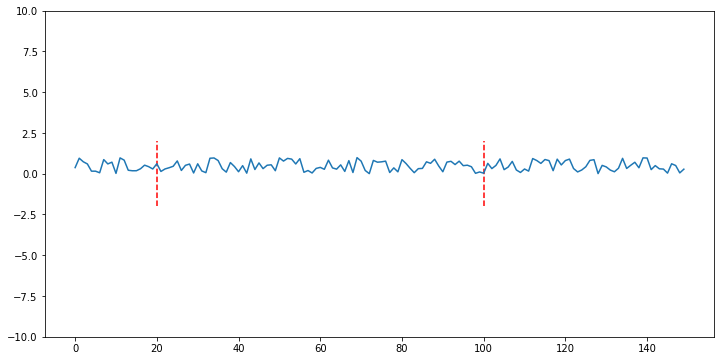

In [28]:
fig, ax = plt.subplots(figsize=(12, 6))

np.random.seed(42)
x = np.random.rand(150)
ax.plot(x)

ax.set_ylim(-10, 10)
ax.vlines([20, 100], -2, 2, linestyles='dashed', colors='red')

In [22]:
COUNT #44 THERE ARE 44 "good" districts to use. 

44

In [24]:
long_chains

['714',
 '5',
 '6',
 '7',
 '8',
 '9',
 '16',
 '19',
 '1452',
 '1298',
 '49',
 '52',
 '53',
 '925',
 '62',
 '68',
 '1218',
 '821',
 '987',
 '956',
 '1692',
 '328',
 '891',
 '106',
 '110',
 '130',
 '1487',
 '2870',
 '958',
 '175',
 '176',
 '4676',
 '2341',
 '1687',
 '2930',
 '211',
 '231',
 '18',
 '250',
 '268',
 '284',
 '297',
 '323',
 '5996']

In [16]:
dict1= {}
dict1["step 1"]= ({"black":{"a": 1, "b":2}, "white": {"a":4, "b":5}})
dict1["step 2"]= ({"black":{"a": 5, "b":2}, "white": {"a":8, "b":7}})

In [18]:
len(dict1)

2

In [21]:
f= open("/home/nix.39/SC_edgerry/output/1452_chain_dict.json",) #didn't work! 
print(json.load(f))


JSONDecodeError: Expecting value: line 1 column 47248 (char 47247)

In [31]:
with open("/home/nix.39/SC_edgerry/output/5996_chain_dict.json", encoding='utf-8', mode='r') as currentFile:
        #print(filename) #this has identifying # 
        number=filename.split("/")[-1].split(".")[0].split("_")[0]
        #f = open('/Users/caranix/Desktop/mpls_chain_dict.json',)
        chain= json.load(currentFile)
        avg_perc_black= []
        avg_income=[]
        isolation=[]
        interaction=[]
        gini=[]
        #num_AZ= chain["0"]["HHincome2019"].keys()
        for i in range(0,len(chain)):
            plan= chain[str(i)]
            avg_perc_black.append(find_perc_black(plan))
            isolation.append(find_isolation(plan))
            avg_income.append(find_avg_income(plan))
            interaction.append(find_interaction(plan))
            gini.append(find_gini(plan))
        #df = pd.DataFrame({'gini': gini, "avg_perc_black" : avg_perc_black, "avg_income" : avg_income, "interaction" : interaction, "isolation" : isolation})
        #df.to_csv("/home/nix.39/SC_edgerry/output/csv/" + str(number) + ".csv")
    
        

In [37]:
chain["0"]

{'HHincome2019': {'12': 25504090,
  '7': 21375852,
  '0': 35922561,
  '17': 47439157,
  '3': 35976643,
  '19': 7293402,
  '9': 23924397,
  '8': 18153750,
  '2': 21907245,
  '21': 12625061,
  '1': 11415637,
  '18': 18677679,
  '11': 6149287,
  '15': 7941421,
  '4': 25563624,
  '16': 14280975,
  '13': 27833677,
  '6': 41138526,
  '20': 6639660,
  '10': 15914830,
  '5': 22599944,
  '14': 9509712},
 'population': {'12': 3039,
  '7': 4926,
  '0': 3233,
  '17': 3105,
  '3': 3968,
  '19': 3444,
  '9': 4532,
  '8': 3831,
  '2': 2743,
  '21': 6546,
  '1': 4971,
  '18': 1759,
  '11': 602,
  '15': 4727,
  '4': 3211,
  '16': 4495,
  '13': 3050,
  '6': 2796,
  '20': 2132,
  '10': 2685,
  '5': 3068,
  '14': 4376},
 'black_population': {'12': 392,
  '7': 1805,
  '0': 104,
  '17': 965,
  '3': 433,
  '19': 1080,
  '9': 736,
  '8': 653,
  '2': 117,
  '21': 3450,
  '1': 3083,
  '18': 660,
  '11': 235,
  '15': 1295,
  '4': 333,
  '16': 2278,
  '13': 435,
  '6': 427,
  '20': 1006,
  '10': 882,
  '5': 553,


In [35]:
plan["black_population"].values()

dict_values([322, 2170, 104, 1234, 505, 934, 873, 584, 115, 2915, 2996, 728, 235, 1040, 367, 2380, 429, 298, 1198, 778, 465, 2099])

0.29478631261409394


Text(0.5,1,'5996')

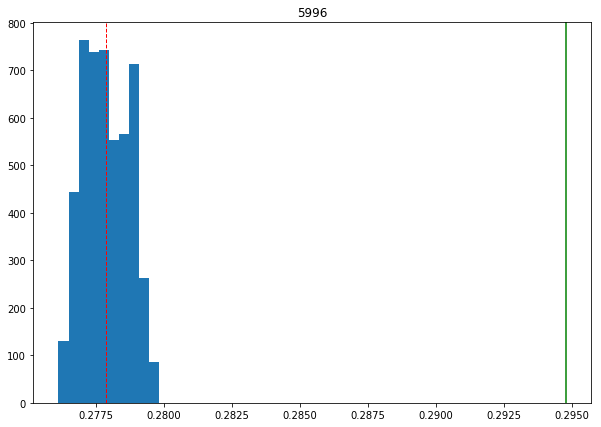

In [40]:
import matplotlib.pyplot as plt
fig3, ax3 = plt.subplots(figsize =(10, 7))
with open("/home/nix.39/SC_edgerry/output/5996_chain_dict.json", encoding='utf-8', mode='r') as currentFile:
    chain= json.load(currentFile)
ax3.hist(avg_perc_black)
plt.axvline(np.mean(avg_perc_black), color='red', linestyle='dashed', linewidth=1)
existing_mean= sum(chain["1"]["black_population"].values())/sum(chain['1']["population"].values())
print(existing_mean)
plt.axvline(existing_mean, color="green")
plt.title(number)